In [76]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1,1], [2,1], [1,2] ,[1.5,1.5], [2,4], [2,5], [4,3], [7,2], [3,3], [2,6], [6,2], [3,4], [4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]

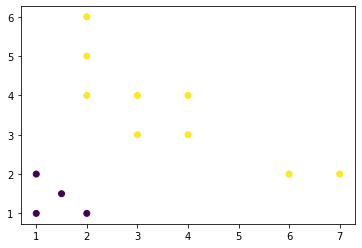

In [3]:
x_x1 = x[:, 0]
x_x2 = x[:, 1]
plt.scatter(x_x1, x_x2, c=y)
plt.show()

In [4]:
svcLinear = SVC(kernel='linear', C=1).fit(x,y)

In [5]:
svcLinear.coef_

array([[0.66666667, 0.66666667]])

In [6]:
svcLinear.intercept_

array([-3.])

### Print decision boundry

In [7]:
x1 = np.array([0,5])
x2 = -1*(svcLinear.intercept_ + svcLinear.coef_[0][0]*x1)/svcLinear.coef_[0][1]

[0, 8, 0, 8]

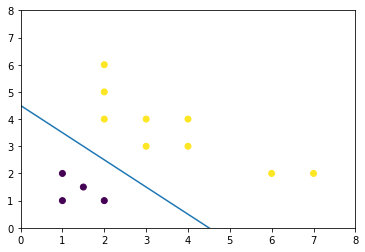

In [8]:
plt.plot(x1, x2) # plot decision boundry

plt.scatter(x_x1, x_x2, c=y)
plt.axis([0,8,0,8])

### Now we change class of one point and then see how decision boundry varies with changing c

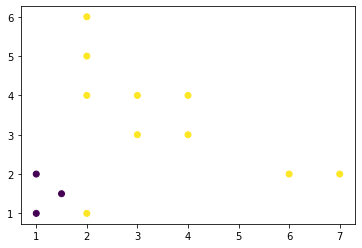

In [9]:
x = np.array([[1,1], [2,1], [1,2] ,[1.5,1.5], [2,4], [2,5], [4,3], [7,2], [3,3], [2,6], [6,2], [3,4], [4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]

x_x1 = x[:, 0]
x_x2 = x[:, 1]
plt.scatter(x_x1, x_x2, c=y)
plt.show()

In [10]:
# Try for different C eg 1, 1000000
svcLinear = SVC(kernel='linear', C=1000000).fit(x,y)

In [11]:
svcLinear.coef_

array([[3.99804688e+00, 4.44089210e-16]])

In [12]:
svcLinear.intercept_

array([-6.99633789])

In [13]:
x1 = np.array([0,5])
x2 = -1*(svcLinear.intercept_ + svcLinear.coef_[0][0]*x1)/svcLinear.coef_[0][1]

[0, 8, 0, 8]

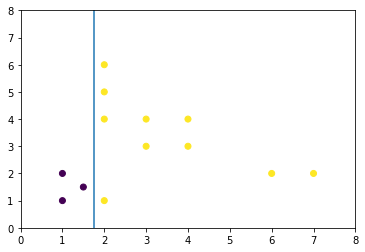

In [14]:
plt.plot(x1, x2) # plot decision boundry

plt.scatter(x_x1, x_x2, c=y)
plt.axis([0,8,0,8])

### SVM on Iris Dataset

In [15]:
iris = datasets.load_iris()

In [16]:
x = iris.data[:,:2] # To visualize the plot we use 2 features (2-D) only
y = iris.target

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=0, test_size=0.3)

In [41]:
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
clf.score(X_test, Y_test)

0.8

In [43]:
def makegrid(x1, x2, h=0.02):
    x1_min, x1_max = x1.min()-1, x1.max()+1
    x2_min, x2_max = x2.min()-1, x2.max()+1
    
    a = np.arange(x1_min,x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    
    xx, yy = np.meshgrid(a,b)
    return xx,yy

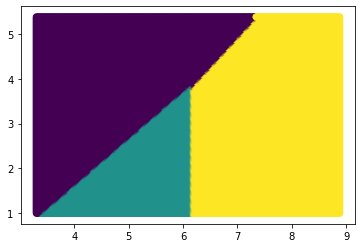

In [44]:
xx, yy = makegrid(x[:,0], x[:,1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])

plt.scatter(xx.ravel(), yy.ravel(), c=predictions)
plt.show()

## Grid Search

### For KNeighbors

In [46]:
x = iris.data
y = iris.target

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=0)

In [53]:
KNN_clf = KNeighborsClassifier()

In [62]:
grid = {'n_neighbors':[3,5,7,9,11]}
abc = GridSearchCV(KNN_clf, grid,iid=True,cv=KFold(3,True,0))

In [63]:
abc.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=True, n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
abc.cv_results_

{'mean_fit_time': array([0.00037344, 0.00082898, 0.        , 0.        , 0.        ]),
 'std_fit_time': array([0.00052813, 0.00061955, 0.        , 0.        , 0.        ]),
 'mean_score_time': array([0.00412345, 0.00416629, 0.00440749, 0.0055271 , 0.00270287]),
 'std_score_time': array([0.00194122, 0.00088302, 0.00335301, 0.0039119 , 0.00382244]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.97368421, 1.        , 1.        , 1.        , 1.        ]),
 'split1_test_score': array([0.89189189, 0.89189189, 0.91891892, 0.91891892, 0.91891892]),
 'split2_test_score': array([1.        , 1.        , 0.94594595, 0.94594595, 0.94594595]),
 'mean_test_score': array([0.95535714, 0.96428571, 0.95535714, 0.95535714, 0.95535714]),


### For SVM

In [66]:
svm_clf = SVC()

In [70]:
grid = {'C':[1e2,1e3, 5e3, 1e4, 5e4, 1e5], 'gamma':[1e-3, 5e-4, 1e-4, 5e-3]}

In [73]:
abc = GridSearchCV(svm_clf, grid, iid=True, cv=KFold(3,True,0))

In [74]:
abc.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=True, n_jobs=None,
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
abc.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Using Support Vectors for Regression

In [81]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=0)

### For rbf kernel

In [85]:
clf_rbf = SVR(kernel='rbf', gamma='auto')
clf_rbf.fit(X_train,Y_train)
clf_rbf.score(X_test, Y_test)

0.005013104464041684

### For linear kernel

In [87]:
clf_linear = SVR(kernel='linear', gamma='auto')
clf_linear.fit(X_train,Y_train)
clf_linear.score(X_test, Y_test)

0.5635479105806482

### Score is much high in case of linear. But we can't say that liear is better in this case because we didn't try different parameters till now. So let just try find best parameter values in case of rbf using GridSearchCV

In [88]:
grid = {'C':[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], 'gamma':[1e-3, 1e-4, 5e-4, 5e-3]}
abc = GridSearchCV(clf_rbf, grid, iid=True, cv=KFold(3,True,0))
abc.fit(X_train, Y_train)
abc.best_estimator_

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
abc.score(X_test, Y_test)

0.602213897685753

### So now we get high score as compared to linear kernel. Similarly if we search best parameters for linear kernel, that may give high score